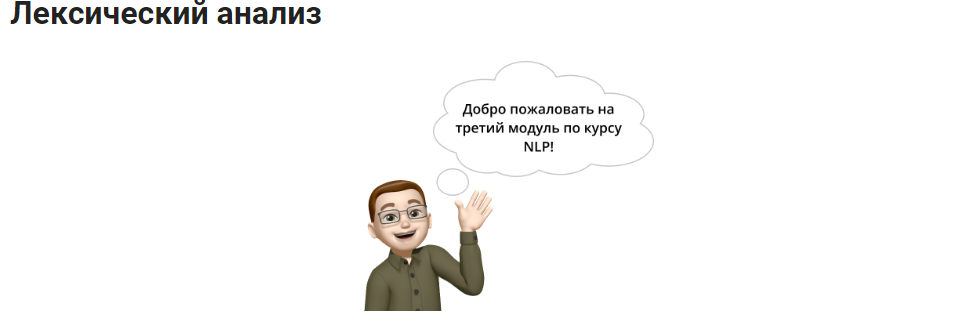

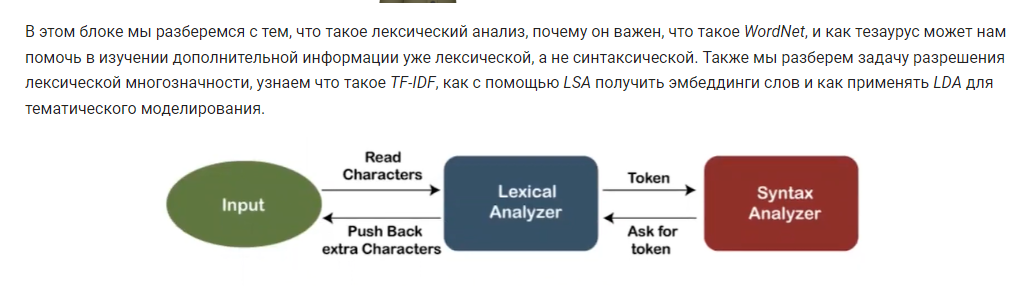

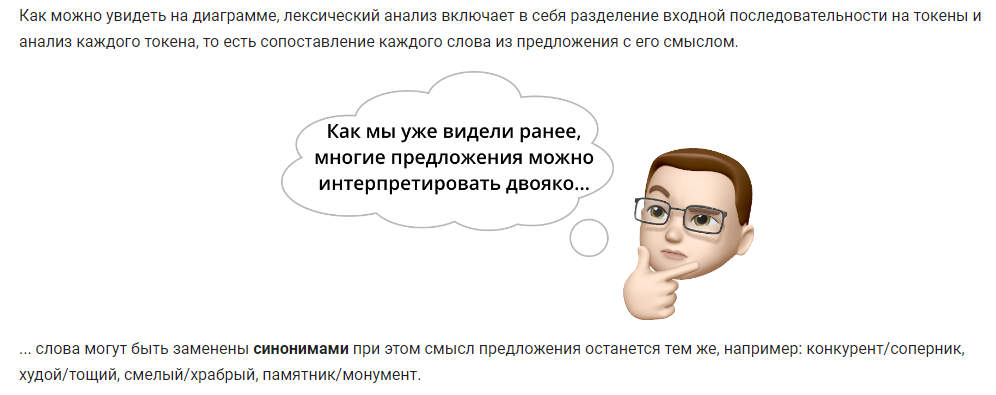

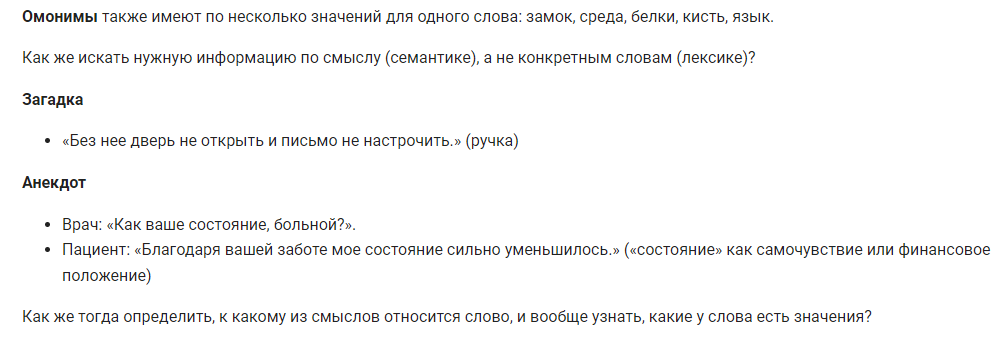

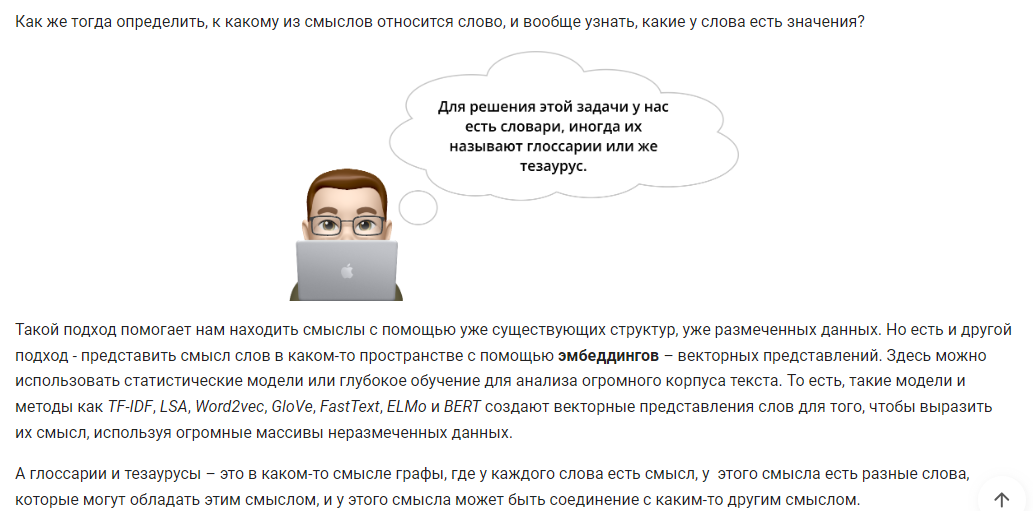

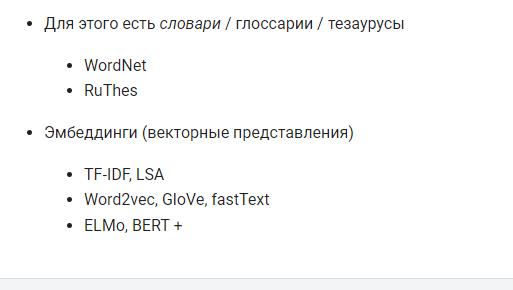

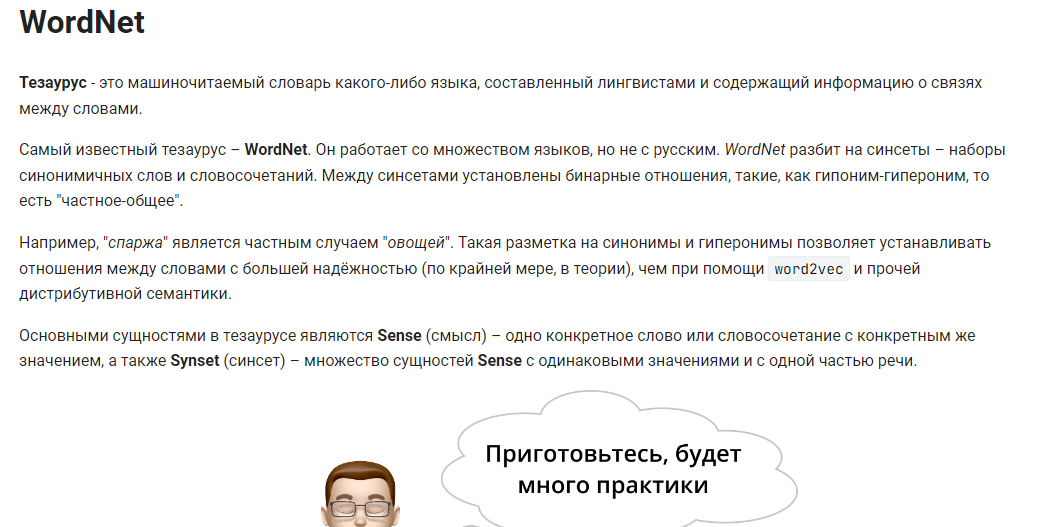

In [1]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Выведем все синсеты для слова «dog» и синсеты слова «dog» с фильтром по части речи

In [2]:
from nltk.corpus import wordnet as wn

print(wn.synsets('dog'))
print(wn.synsets('dog', pos=wn.VERB))

[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]
[Synset('chase.v.01')]


Изучим подробнее синсет «dog.n.01»

In [3]:
print(wn.synset('dog.n.01'))
print(wn.synset('dog.n.01').definition())
print(len(wn.synset('dog.n.01').examples()))
print(wn.synset('dog.n.01').examples()[0])

Synset('dog.n.01')
a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
1
the dog barked all night


Также можно вывести все леммы для конкретного синсета:

In [4]:
print(wn.synset('dog.n.01').lemmas())
print([str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()])
print(wn.lemma('dog.n.01.dog').synset())

[Lemma('dog.n.01.dog'), Lemma('dog.n.01.domestic_dog'), Lemma('dog.n.01.Canis_familiaris')]
['dog', 'domestic_dog', 'Canis_familiaris']
Synset('dog.n.01')


Возвращаясь к гиперонимам и гипонимам, можно посмотреть, для гиперонимы и гипонимы для синсета «dog.n.01». Гипонимами в данном случае будут разные варианты пород собак.

Также можно проверить, частью чего может быть синсет, в данном случае это синсет «pack.n.06» – стая.

Еще можно посмотреть на общий самый низкий в иерархии гипероним с другим синсетом – «cat.n.0.1». Это будет «carnivore.n.01» – хищник.

In [5]:
dog = wn.synset('dog.n.01')
print(dog.hypernyms())
print(dog.hyponyms())
print(dog.member_holonyms())
print(dog.root_hypernyms())
print(wn.synset('dog.n.01').lowest_common_hypernyms(wn.synset('cat.n.01')))

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]
[Synset('canis.n.01'), Synset('pack.n.06')]
[Synset('entity.n.01')]
[Synset('carnivore.n.01')]


WordNet позволяет нам получать антонимы слов:

In [6]:
good = wn.synset('good.a.01')
good.lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

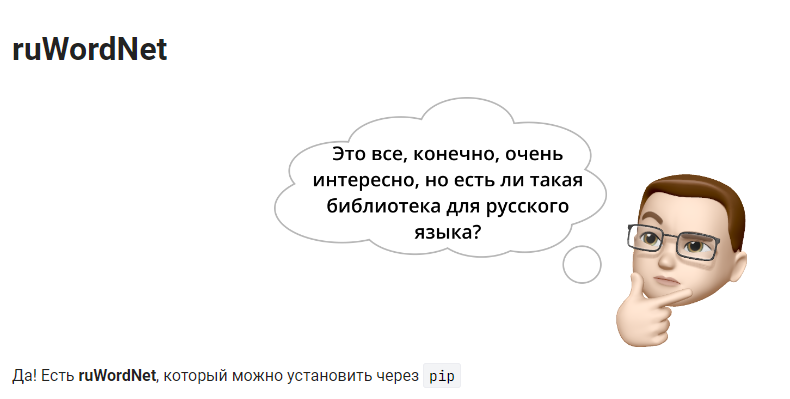

In [7]:
!pip install ruwordnet
!ruwordnet download

from ruwordnet import RuWordNet
wn = RuWordNet()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.3 MB/s eta 0:00:00
  Created wheel for ruwordnet: filename=ruwordnet-0.0.6-py3-none-any.whl size=13169 sha256=4ae7d2920d52ac0e2be2684c0cbc9d71e5032c714506a5d7fbe0db9ee27c7ad3
  Stored in directory: /root/.cache/pip/wheels/6f/75/be/a338d987d811bbfe38a40a76166cc84dfdc88e02eadc3ff9c0
Successfully built ruwordnet
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.21
    Uninstalling SQLAlchemy-2.0.21:
      Successfully uninstalled SQLAlchemy-2.0.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.49 which is incompatible.
downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.4/ruwordnet-2021.db


Можно посмотреть, какие есть смыслы у слова «замок»:

In [8]:
for sense in wn.get_senses('замок'):
    print(sense.synset)

Synset(id="126228-N", title="СРЕДНЕВЕКОВЫЙ ЗАМОК")
Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")


Как и в NLTK, можно получить список гиперонимов для синсета:

In [9]:
wn.get_senses('спаржа')[0].synset.hypernyms

[Synset(id="348-N", title="ОВОЩИ"),
 Synset(id="4789-N", title="ТРАВЯНИСТОЕ РАСТЕНИЕ"),
 Synset(id="6878-N", title="ОВОЩНАЯ КУЛЬТУРА")]

 И гипонимов:

In [10]:
wn.get_senses('овощи')[0].synset.hyponyms

[Synset(id="144194-N", title="ТЫКВА (ПЛОД)"),
 Synset(id="153883-N", title="ЗЕЛЕНЬ (ОВОЩИ)"),
 Synset(id="144191-N", title="ПОМИДОР (ПЛОД)"),
 Synset(id="144205-N", title="ПАТИССОН (ПЛОД)"),
 Synset(id="118660-N", title="ЗЕЛЕНЫЙ ГОРОШЕК"),
 Synset(id="144182-N", title="ЛУК (РАСТЕНИЕ)"),
 Synset(id="144207-N", title="СТРУЧКОВЫЙ ПЕРЕЦ (ПЛОД)"),
 Synset(id="144181-N", title="БАКЛАЖАН (ПЛОД)"),
 Synset(id="107993-N", title="АРТИШОК"),
 Synset(id="144216-N", title="КАБАЧОК (ПЛОД)"),
 Synset(id="144183-N", title="ЧЕСНОК"),
 Synset(id="108482-N", title="СПАРЖА"),
 Synset(id="144232-N", title="КОЧАН КАПУСТЫ"),
 Synset(id="148896-N", title="КОРНЕПЛОДНЫЕ ОВОЩИ"),
 Synset(id="144184-N", title="ОГУРЕЦ (ПЛОД)")]

Можно заметить, что интерфейс методов ruWordNet немного отличается от английского – здесь у нас всегда есть слово get, и мы можем получать смысл по id. Также можно получать смыслы и синсеты как для русских слов, так и для английских.

In [11]:
print(wn.get_synset_by_id("134045-N"))
print(wn.get_en_synset_by_id("11493827-n"))
print(wn.get_senses('потенциал'))
print(wn.get_synsets('потенциал'))
print(wn.get_en_senses('potential'))
print(wn.get_en_synsets('potential'))

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)"), Synset(id="134046-N", title="ПОТЕНЦИАЛ (РЕСУРС)")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]
[WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts"), WNSynset(id="00044353-a", definition="existing in possibility"), WNSynset(id="14482620-n", definition="the inherent capacity for coming into being")]


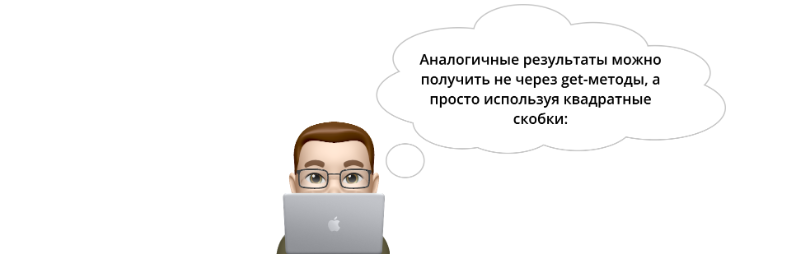

In [12]:
print(wn['134045-N'])
print(wn['11493827-n'])
print(wn['134045-N-189287'])
print(wn['electric_potential%1:19:00::'])
print(wn['потенциал'])
print(wn['potential'])

Synset(id="134045-N", title="ПОТЕНЦИАЛ (ФИЗИЧЕСКАЯ ВЕЛИЧИНА)")
WNSynset(id="11493827-n", definition="the difference in electrical charge between two points in a circuit expressed in volts")
Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ")
WNSense(key="electric_potential%1:19:00::", name="electric_potential")
[Sense(id="134045-N-189287", name="ПОТЕНЦИАЛ"), Sense(id="134046-N-189287", name="ПОТЕНЦИАЛ")]
[WNSense(key="potential%1:19:00::", name="potential"), WNSense(key="potential%3:00:00::", name="potential"), WNSense(key="potential%1:26:00::", name="potential")]


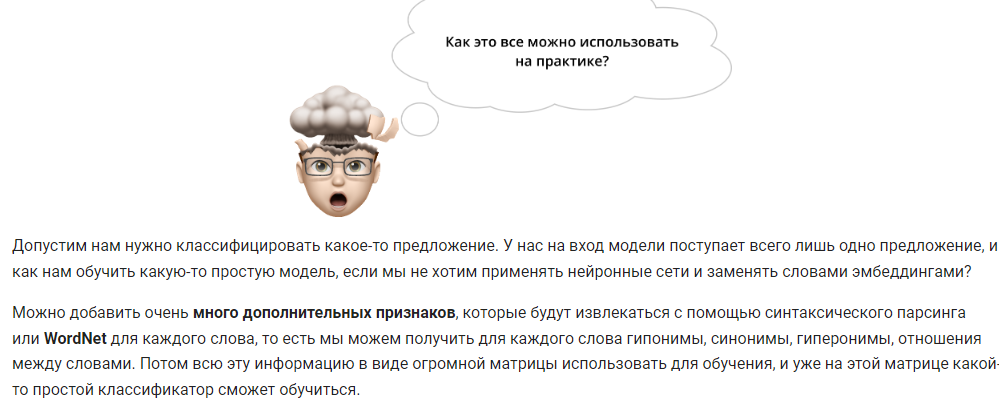

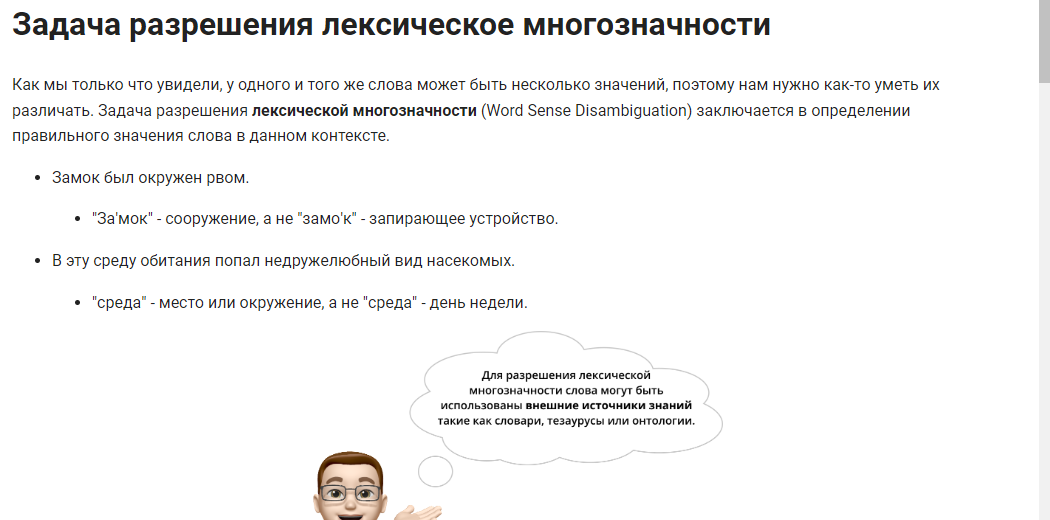

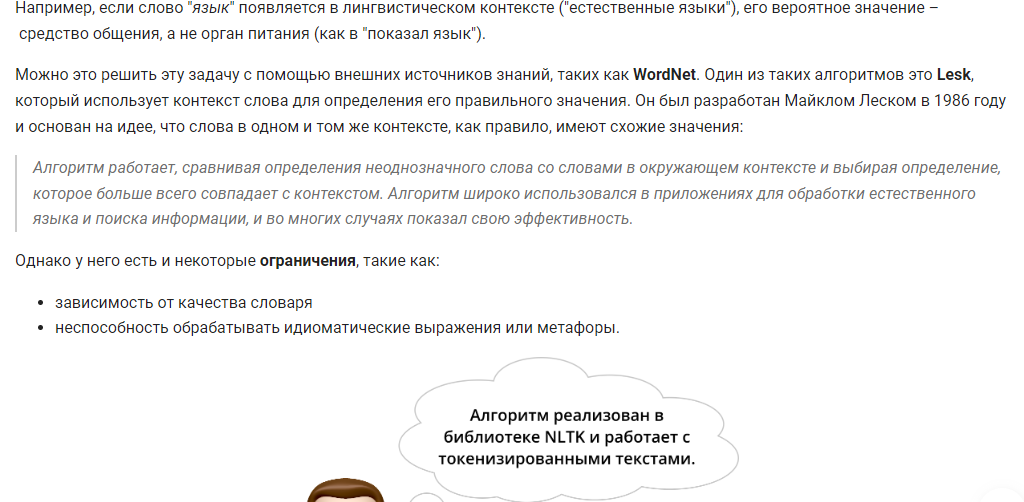

In [13]:
import nltk
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize

nltk.download('punkt')


def get_semantic(seq, key_word):
      # Tokenization of the sequence
    temp = word_tokenize(seq)

    # Retrieving the definition of the tokens
    temp = lesk(temp, key_word)
    return temp.definition()

keyword = 'book'
seq1 = 'I love reading books on coding.'
seq2 = 'The table was already booked by someone else.'

print(get_semantic(seq1, keyword))
print(get_semantic(seq2, keyword))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


a number of sheets (ticket or stamps etc.) bound together on one edge
arrange for and reserve (something for someone else) in advance


То же самое можно сделать для русского языка, здесь мы не сможем воспользоваться библиотекой NLTK, поэтому реализуем все сами:

In [14]:
from ruwordnet import RuWordNet

wn = RuWordNet()


def rulesk(context_sentence, ambiguous_word):
    context = set(
        word_tokenize(context_sentence)
    )  # можно добавить лемматизацию, можно добавлять синонимы/антонимы/гипернимы, взвешивать по IDF...
    synsets = wn.get_synsets(ambiguous_word)
    sense = max(
        synsets,
        key=lambda ss: len(context.intersection(word_tokenize(ss.definition))))
    return sense

In [15]:

rulesk("ручка совсем перестала писать", "ручка")

Synset(id="139821-N", title="РУКОЯТКА УПРАВЛЕНИЯ")

In [16]:
[(x.title, x.definition) for x in wn.get_synsets("ручка")]

[('РУКОЯТКА УПРАВЛЕНИЯ', ''),
 ('РУКА (КОНЕЧНОСТЬ)',
  'одна из двух верхних конечностей человека, от плеча до конца пальцев'),
 ('РУЧКА ДЛЯ ДЕРЖАНИЯ',
  'часть предмета, за которую его можно брать рукой, держать или перемещать'),
 ('РУЧКА ДЛЯ ПИСЬМА',
  'письменная принадлежность в виде удлиненного стержня, на конце которого находится перо или другое пишущее приспособление'),
 ('РУЧКА, ПОДЛОКОТНИК',
  'опора для рук (локтей) на стуле c подлокотниками или мягкой мебелиподлокотник кресла')]

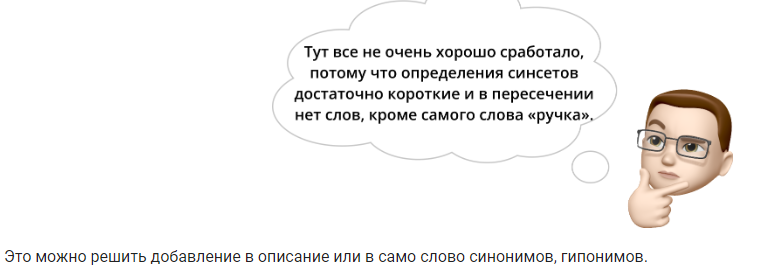

In [17]:
rulesk("не могу открыть замок ключом", "замок")

Synset(id="114707-N", title="ЗАМОК ДЛЯ ЗАПИРАНИЯ")

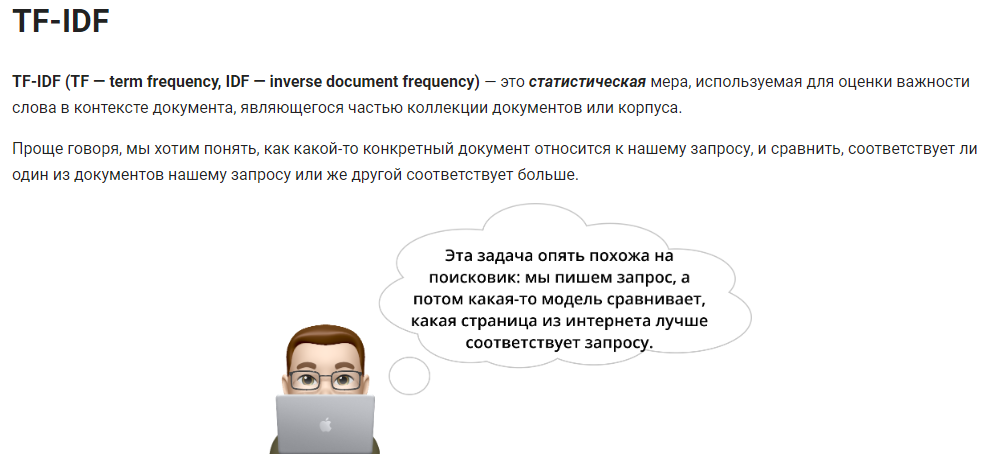

In [18]:
request = "The market capitalization of Tesla company"
documents = [
    "Tesla, Inc. is an American electric vehicle and clean energy company.",
    "Tesla has a market capitalization of $569.93 Billion according to our data.",
    "Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.",
    "Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.",
]

В данном случае у нас есть запрос «рыночная капитализация компании Tesla» и несколько документов. Мы хотим понять, какой из этих документов больше всего соответствует нашему запросу. Внимательно посмотрев на них, можно увидеть, что лучше всего подходит именно вторая строчка – второй документ.

Как же нам решить эту задачу? Можно попробовать сделать это, как мы делали в алгоритме Lesk – сравнить, какие слова есть в запросе и в ответах, и посчитать, пересечение слов больше.

In [19]:
for d in documents:
    score = sum(r == w for r in nltk.word_tokenize(request.lower())
                for w in nltk.word_tokenize(d.lower()))
    print(f"{score} - {d}")

2 - Tesla, Inc. is an American electric vehicle and clean energy company.
4 - Tesla has a market capitalization of $569.93 Billion according to our data.
4 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
8 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


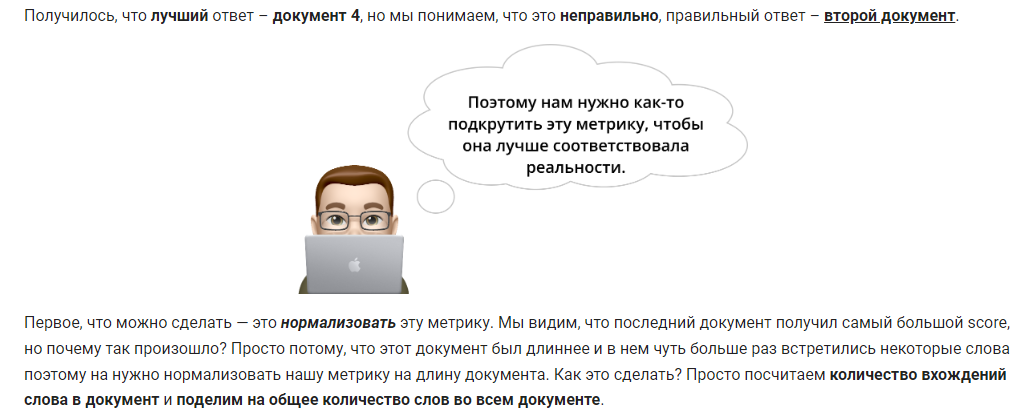

In [21]:
def TF(term, doc):
    words = nltk.word_tokenize(doc)
    counts = sum(term == w for w in words)
    return counts / len(words)


for d in documents:
    score = sum(TF(r, d.lower()) for r in nltk.word_tokenize(request.lower()))
    print(f"{score:.3f} - {d}")

0.154 - Tesla, Inc. is an American electric vehicle and clean energy company.
0.286 - Tesla has a market capitalization of $569.93 Billion according to our data.
0.211 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
0.348 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


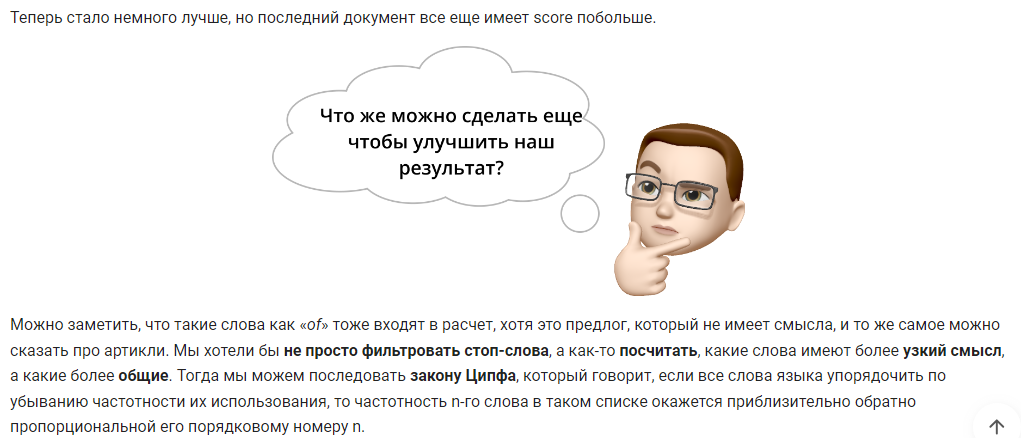

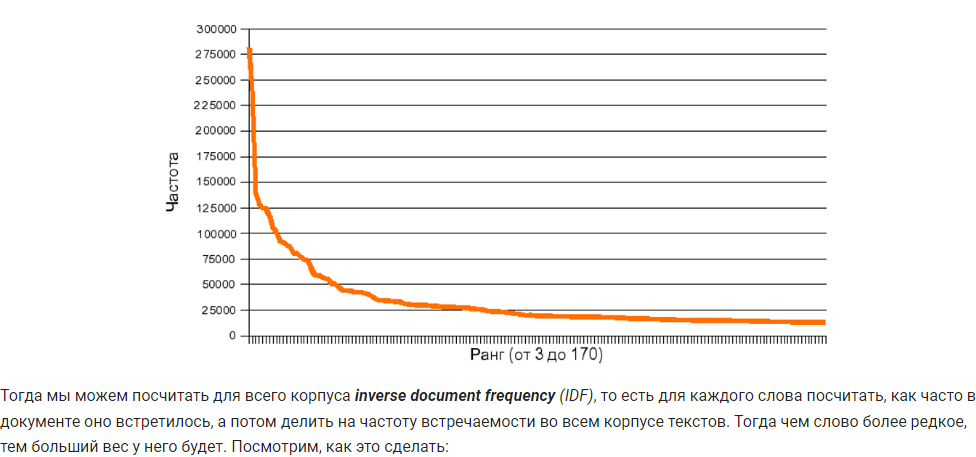

Тогда мы можем посчитать для всего корпуса inverse document frequency (IDF), то есть для каждого слова посчитать, как часто в документе оно встретилось, а потом делить на частоту встречаемости во всем корпусе текстов. Тогда чем слово более редкое, тем больший вес у него будет. Посмотрим, как это сделать:

In [22]:
import math

from collections import Counter
from nltk.corpus import reuters

nltk.download('reuters')


def DF(term, docs):
    counts = sum(term in [w.lower() for w in reuters.words(d)] for d in docs)
    counts = counts if counts > 0 else 1
    return counts / len(docs)


files = reuters.fileids()
IDF = {
    r: math.log(1 / DF(r, files))
    for r in nltk.word_tokenize(request.lower())
}
print(IDF)

[nltk_data] Downloading package reuters to /root/nltk_data...


{'the': 0.4395488711591346, 'market': 2.0117101254857497, 'capitalization': 8.593042503699674, 'of': 0.34739560282581505, 'tesla': 9.28618968425962, 'company': 1.4450899188375008}


Оценим все документы на то, как они относятся к нашему запросу:

In [24]:
for d in documents:
    score = sum(
        TF(w, d.lower()) * IDF[w] for w in nltk.word_tokenize(request.lower()))
    print(f"{score:.3f} - {d}")

0.825 - Tesla, Inc. is an American electric vehicle and clean energy company.
1.446 - Tesla has a market capitalization of $569.93 Billion according to our data.
0.553 - Nikola Tesla was born in the Austrian Empire on 10 July 1856 in the family of a priest.
1.082 - Apple company has a market capitalization of $2.403 Trillion. Apple is the world's most valuable company by market capitalization.


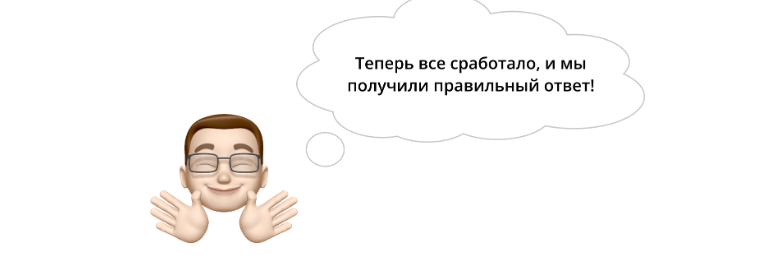

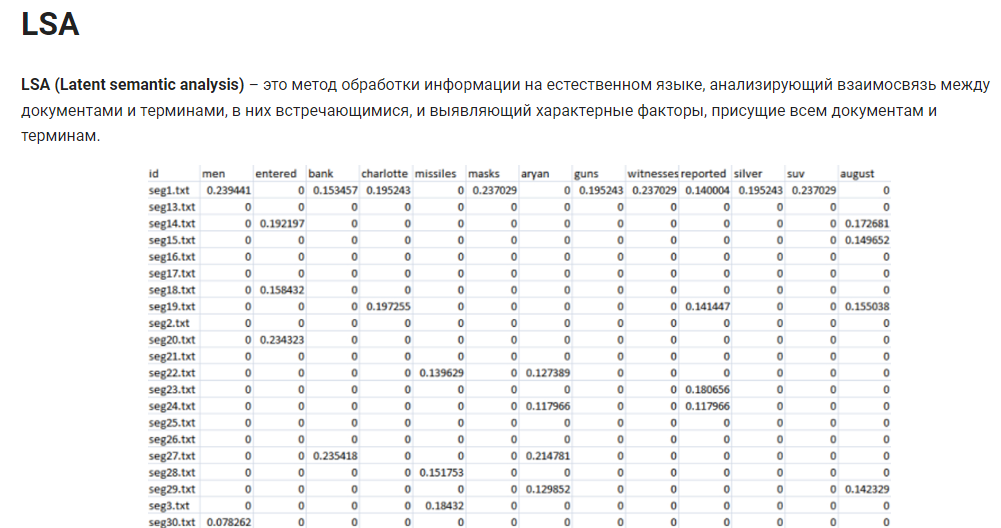

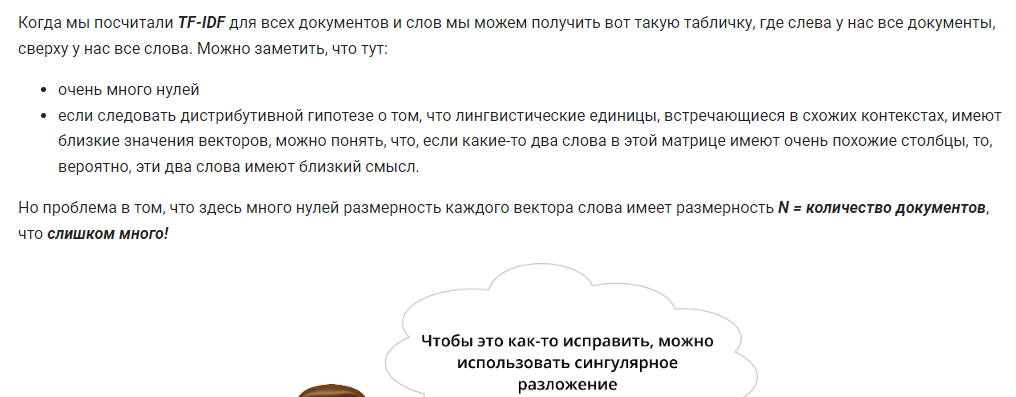

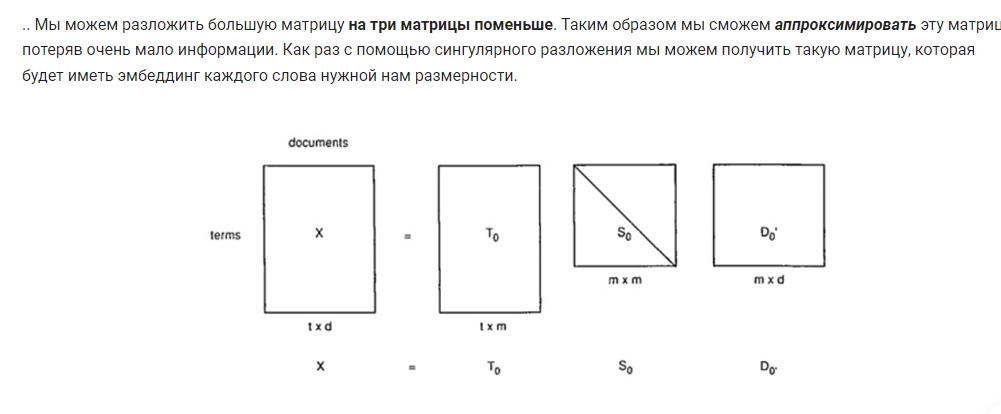

Но опять же здесь есть и минус в том, что порядок слов никак не учитывается. TF-IDF по сути работает как Bag-of-words, где каждый документ – это мешок слов, и их порядок мы никак не учитываем.

Рассмотрим пример с датасетом reuters

In [25]:
import re
import nltk
from nltk.corpus import reuters

nltk.download("reuters")


def simple_preprocess(s):
    s = re.sub(r"[^a-z]+", " ", s.lower())
    s = re.sub(r"\s{2,}", " ", s)
    return s.strip()


corpus = [
    simple_preprocess(" ".join(reuters.words(f))) for f in reuters.fileids()
]
words = set(w.lower() for d in corpus for w in d.split())

print(len(corpus))
print(len(words))

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


10788
29187


После нормализации можно увидеть, что в корпусе много документов – 10788 и всего слов в корпусе 29187.

Теперь, используя TfIdfVectorizer из библиотеки scikit-learn, можно получить матрицу TF-IDF размерности 10788x29187.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(10788, 29161)

Также можно посмотреть на то, какие у нас слова есть в нашем словаре среди 29 тысяч слов.



In [28]:
{w for w in words if w not in vectorizer.vocabulary_}

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

{w for w in words if w not in vectorizer.vocabulary_}
Далее мы можем получить с помощью этого векторизатора конкретные id каждого из слов:

In [29]:
print(vectorizer.vocabulary_["king"])
print(vectorizer.vocabulary_["queen"])
print(vectorizer.vocabulary_["wolf"])
print(vectorizer.vocabulary_["dog"])

14229
20754
28767
7685


Теперь, если мы транспонируем матрицу, чтобы получать эмбеддинги не для документов, а для слов, и подставим нужный нам id, мы получим вектор этого слова.

In [30]:
vector = X.T[vectorizer.vocabulary_["king"]]
vector

<1x10788 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Column format>

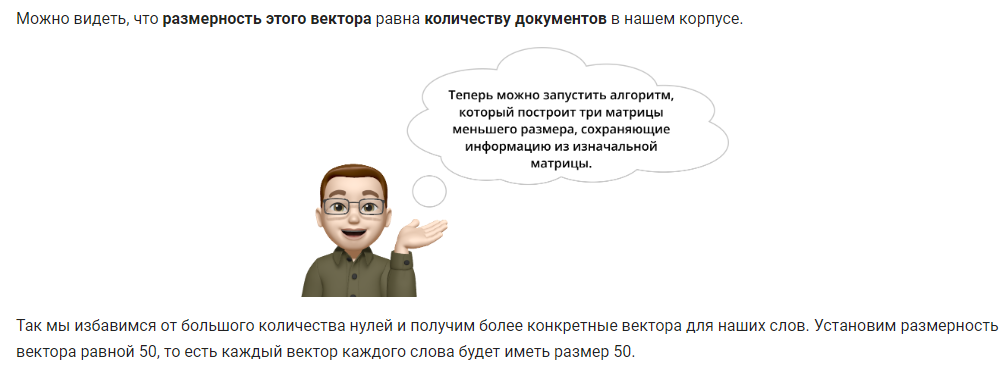

In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(X.T)
X_svd.shape

(29161, 50)

Теперь мы можем получать эмбеддинг для конкретного слова, можно считать расстояния между векторами и как-то сравнивать, насколько определенные близки слова

In [31]:
from scipy.spatial import distance


def get_embedding(word):
    return X_svd[vectorizer.vocabulary_[word]]


print(distance.euclidean(get_embedding("king"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("queen")))
print(distance.euclidean(get_embedding("book"), get_embedding("queen")))
print(distance.euclidean(get_embedding("hair"), get_embedding("book")))

0.08423915949131493
0.027611037846793543
0.07238960728113532
0.07471100672654345


Как можно заметить, у нас слова получились достаточно равноудаленными друг от друга. Вероятно, это из-за небольшого датасета и несовершенной модели, не учитывающей порядок слов.

Также можно сравнить, как относится слово «волк» к разным словам:

In [32]:
print(distance.euclidean(get_embedding("wolf"), get_embedding("book")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("dog")))
print(distance.euclidean(get_embedding("wolf"), get_embedding("hare")))

0.08049414907653807
0.03404800822639001
0.03349974404283036


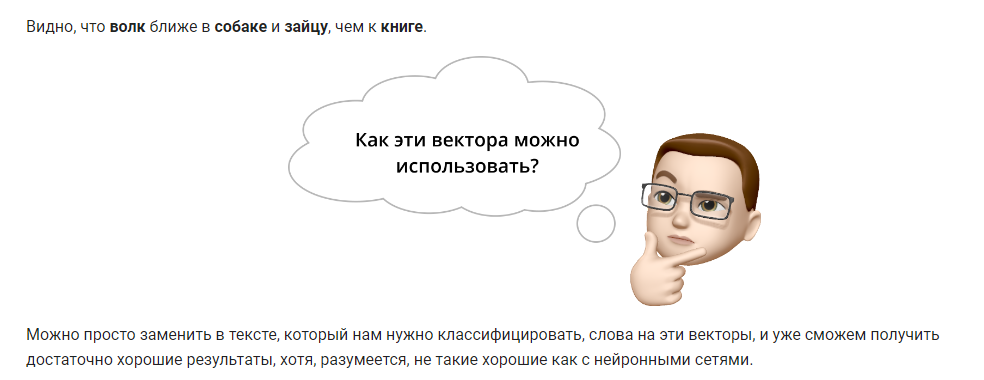

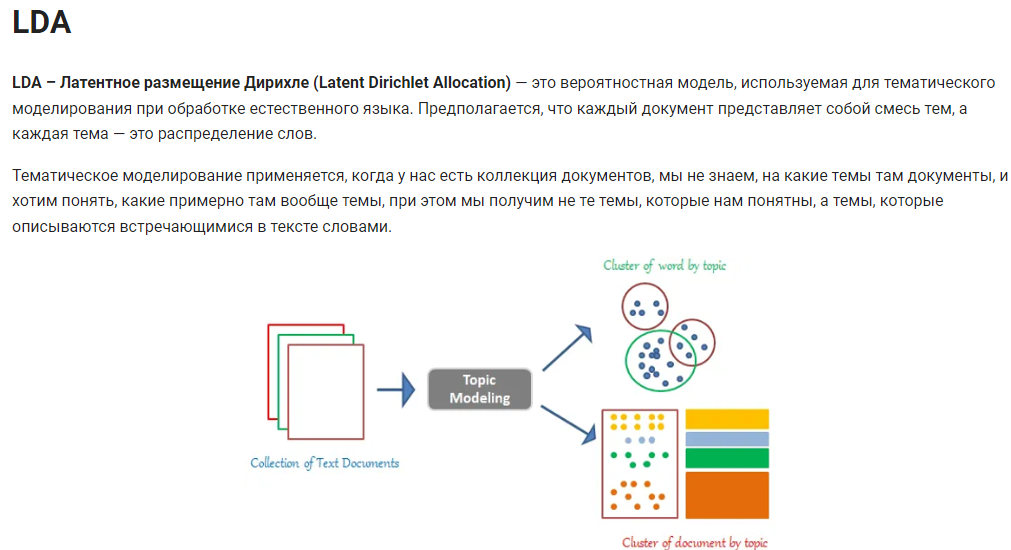

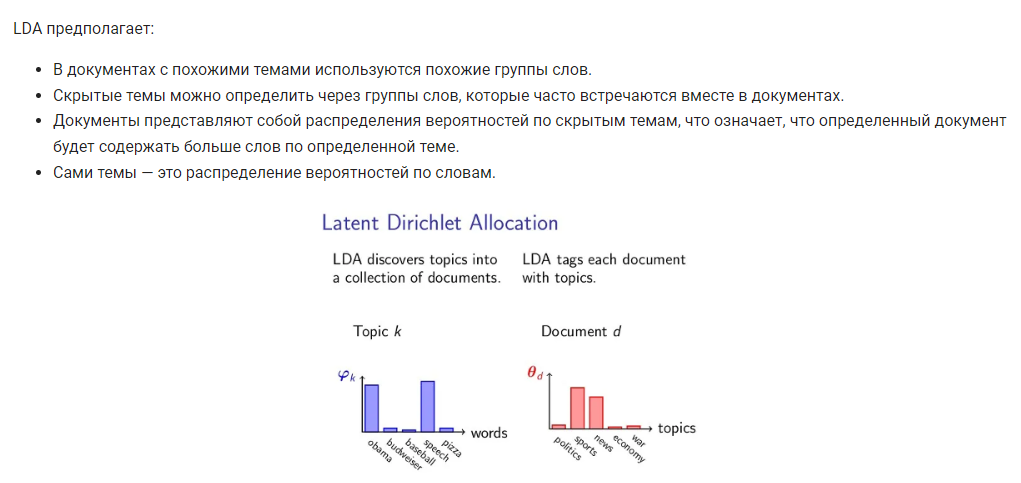

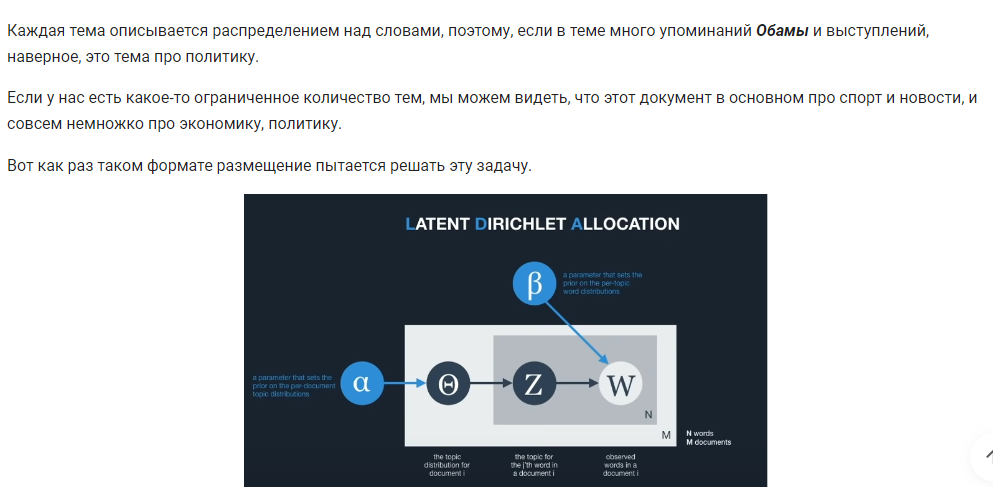

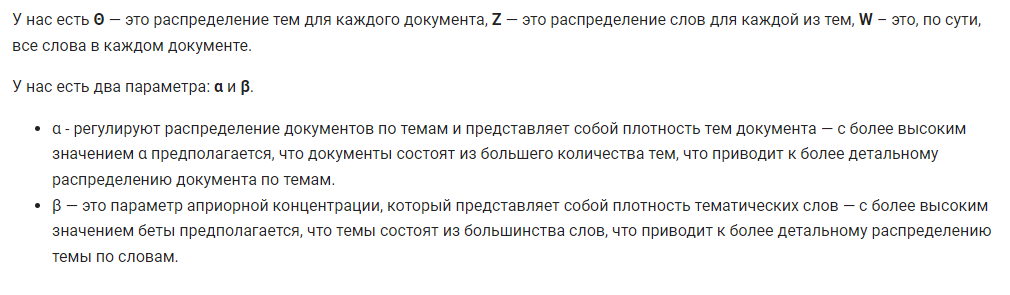

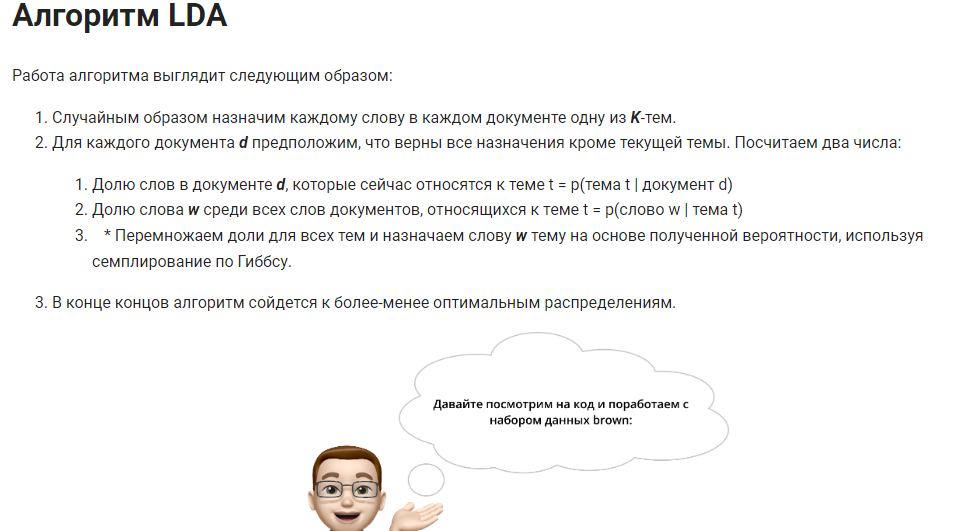

In [33]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import brown

nltk.download("brown")

corpus = [" ".join(brown.words(file_id)) for file_id in brown.fileids()]


tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)
lda.fit(tfidf)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


LatentDirichletAllocation(n_components=7, topic_word_prior=0.05)

После обучения модели мы получим следующие 7 тем, которые характеризуются 15-ю самыми вероятными словами для каждой из тем:

In [34]:
# Print top 15 words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-16:-1]]))
    print()

Topic #0:
af tax anti labor range game miles temperature corps thomas plane understanding systems officer treatment

Topic #1:
elections prokofieff morgan winston pip republican banion matsuo questionnaire haney hughes allotment aug thyroid 1962

Topic #2:
said man like time did world men people way just good life old little day

Topic #3:
state states united social national law development political economic class community south students court federal

Topic #4:
mrs house mr year president new city american public night john white church door york

Topic #5:
morgan artery brannon hal patchen penny barton keith rousseau nick libraries cancer malraux clay mold

Topic #6:
hardy kate hans scotty gorton greg dartmouth johnnie wright felix owen letch eugene theresa miriam



Выведем темы для случайного документа:

In [35]:
# Print topics for a sample document
doc_num = 101
print("Sample Document:\n", corpus[doc_num][:200])
print("\nTopics for Sample Document:\n")

for index in lda.transform(tfidf[doc_num])[0].argsort()[-3:]:
    print("Topic #%d" % index)

Sample Document:
 To what extent and in what ways did Christianity affect the United States of America in the nineteenth century ? ? How far and in what fashion did it modify the new nation which was emerging in the mi

Topics for Sample Document:

Topic #3
Topic #2
Topic #0


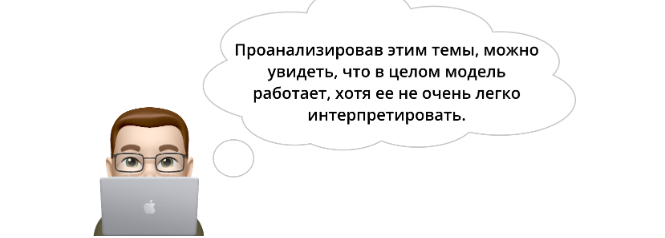